Try various CNN networks on MNIST dataset 

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
batch_size = 128
num_classes = 10
epochs = 8

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Model 1 (normal), kernel_size=(3, 3)


In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dense_2 (Dense)              (None, 10)           

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1807 - acc: 0.9441 - val_loss: 0.0559 - val_acc: 0.9816
Epoch 2/8
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0309 - val_acc: 0.9894
Epoch 3/8
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.0274 - val_acc: 0.9906
Epoch 4/8
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0195 - acc: 0.9939 - val_loss: 0.0315 - val_acc: 0.9909
Epoch 5/8
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0365 - val_acc: 0.9885
Epoch 6/8
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0097 - acc: 0.9974 - val_loss: 0.0309 - val_acc: 0.9915
Epoch 7/8
60000/60000 [========

Test loss: 0.04928296602889534
Test accuracy: 0.9884


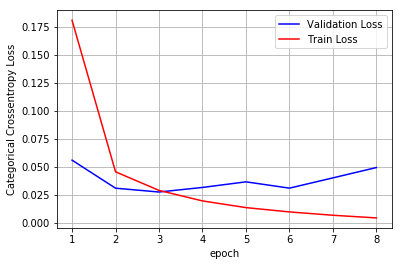

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 1 (with padding), kernel_size=(3, 3) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 259s 4ms/step - loss: 0.1819 - acc: 0.9436 - val_loss: 0.0557 - val_acc: 0.9826
Epoch 2/8
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0446 - acc: 0.9863 - val_loss: 0.0344 - val_acc: 0.9878
Epoch 3/8
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0269 - acc: 0.9918 - val_loss: 0.0328 - val_acc: 0.9886
Epoch 4/8
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0179 - acc: 0.9945 - val_loss: 0.0316 - val_acc: 0.9901
Epoch 5/8
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0311 - val_acc: 0.9909
Epoch 6/8
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0311 - val_acc: 0.9913
Epoch 7/8
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0387 - val_acc

Test loss: 0.047212022333210237
Test accuracy: 0.9889


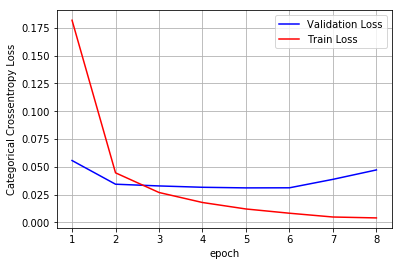

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 1 (with batch normal), kernel_size=(3, 3) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)          

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 430s 7ms/step - loss: 0.2965 - acc: 0.9455 - val_loss: 0.0940 - val_acc: 0.9734
Epoch 2/8
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0525 - acc: 0.9849 - val_loss: 0.0737 - val_acc: 0.9806
Epoch 3/8
60000/60000 [==============================] - 435s 7ms/step - loss: 0.0299 - acc: 0.9911 - val_loss: 0.0458 - val_acc: 0.9890
Epoch 4/8
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0176 - acc: 0.9948 - val_loss: 0.0598 - val_acc: 0.9859
Epoch 5/8
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.0458 - val_acc: 0.9892
Epoch 6/8
60000/60000 [==============================] - 430s 7ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0408 - val_acc: 0.9912
Epoch 7/8
60000/60000 [==============================] - 427s 7ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0431 - val_acc

Test loss: 0.0437732702759823
Test accuracy: 0.9922


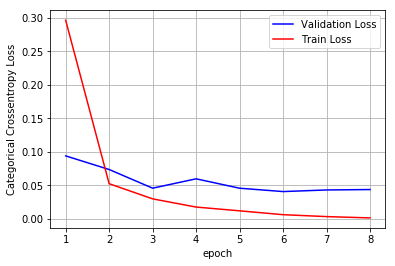

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 1 ( with dropout), kernel_size=(3, 3)

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)      

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 480s 8ms/step - loss: 0.4225 - acc: 0.8986 - val_loss: 0.0825 - val_acc: 0.9771
Epoch 2/8
60000/60000 [==============================] - 480s 8ms/step - loss: 0.1411 - acc: 0.9627 - val_loss: 0.0582 - val_acc: 0.9844
Epoch 3/8
60000/60000 [==============================] - 484s 8ms/step - loss: 0.1122 - acc: 0.9707 - val_loss: 0.0568 - val_acc: 0.9845
Epoch 4/8
60000/60000 [==============================] - 478s 8ms/step - loss: 0.0936 - acc: 0.9762 - val_loss: 0.1241 - val_acc: 0.9751
Epoch 5/8
60000/60000 [==============================] - 474s 8ms/step - loss: 0.0844 - acc: 0.9784 - val_loss: 0.0518 - val_acc: 0.9863
Epoch 6/8
60000/60000 [==============================] - 474s 8ms/step - loss: 0.0714 - acc: 0.9810 - val_loss: 0.0468 - val_acc: 0.9860
Epoch 7/8
60000/60000 [==============================] - 478s 8ms/step - loss: 0.0707 - acc: 0.9819 - val_loss: 0.0522 - val_acc

Test loss: 0.046881950073685404
Test accuracy: 0.9881


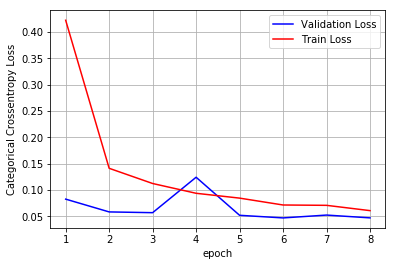

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 #### Observation:
    From above plot we can see that train and test data loss are getting converged.

### Model 2 (normal), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 32)        2080      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 128)       32896     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 256)       131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)            

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 715s 12ms/step - loss: 0.2166 - acc: 0.9329 - val_loss: 0.0514 - val_acc: 0.9814
Epoch 2/8
60000/60000 [==============================] - 711s 12ms/step - loss: 0.0432 - acc: 0.9865 - val_loss: 0.0406 - val_acc: 0.9876
Epoch 3/8
60000/60000 [==============================] - 710s 12ms/step - loss: 0.0258 - acc: 0.9920 - val_loss: 0.0448 - val_acc: 0.9857
Epoch 4/8
60000/60000 [==============================] - 708s 12ms/step - loss: 0.0162 - acc: 0.9947 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 5/8
60000/60000 [==============================] - 705s 12ms/step - loss: 0.0111 - acc: 0.9963 - val_loss: 0.0354 - val_acc: 0.9907
Epoch 6/8
60000/60000 [==============================] - 707s 12ms/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0514 - val_acc: 0.9869
Epoch 7/8
60000/60000 [==

Test loss: 0.06105709071709962
Test accuracy: 0.9891


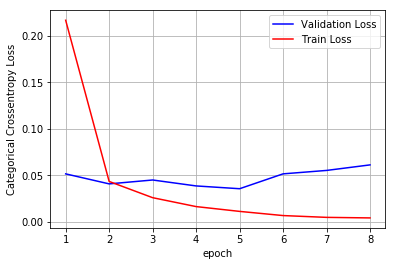

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 2 ( with padding), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       32896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 256)       131328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 1161s 19ms/step - loss: 0.2756 - acc: 0.9163 - val_loss: 0.0568 - val_acc: 0.9811
Epoch 2/8
60000/60000 [==============================] - 1171s 20ms/step - loss: 0.0813 - acc: 0.9757 - val_loss: 0.0466 - val_acc: 0.9847
Epoch 3/8
60000/60000 [==============================] - 1185s 20ms/step - loss: 0.0586 - acc: 0.9819 - val_loss: 0.0297 - val_acc: 0.9903
Epoch 4/8
60000/60000 [==============================] - 1155s 19ms/step - loss: 0.0458 - acc: 0.9859 - val_loss: 0.0318 - val_acc: 0.9898
Epoch 5/8
60000/60000 [==============================] - 1160s 19ms/step - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0299 - val_acc: 0.9909
Epoch 6/8
60000/60000 [==============================] - 1160s 19ms/step - loss: 0.0320 - acc: 0.9906 - val_loss: 0.0253 - val_acc: 0.9915
Epoch 7/8
60000/6000

Test loss: 0.028772561838423052
Test accuracy: 0.9914


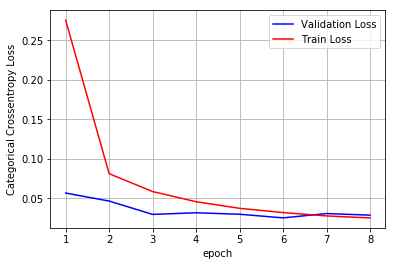

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

### Model 2 ( with batch normal), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())









Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       32896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 256)       131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 256

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 1815s 30ms/step - loss: 0.0695 - acc: 0.9801 - val_loss: 0.0438 - val_acc: 0.9867
Epoch 2/8
60000/60000 [==============================] - 1804s 30ms/step - loss: 0.0256 - acc: 0.9923 - val_loss: 0.0460 - val_acc: 0.9850
Epoch 3/8
60000/60000 [==============================] - 1817s 30ms/step - loss: 0.0121 - acc: 0.9968 - val_loss: 0.0279 - val_acc: 0.9906
Epoch 4/8
60000/60000 [==============================] - 1816s 30ms/step - loss: 0.0071 - acc: 0.9981 - val_loss: 0.0398 - val_acc: 0.9879
Epoch 5/8
60000/60000 [==============================] - 1820s 30ms/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0273 - val_acc: 0.9916
Epoch 6/8
60000/60000 [==============================] - 1817s 30ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0289 - val_acc: 0.9914
Epoch 7/8
60000/60000 [==============================] - 1816s 30ms/step - loss: 5.0714e-04 - acc: 1.0000 - val_loss

Test loss: 0.026885366498380973
Test accuracy: 0.992


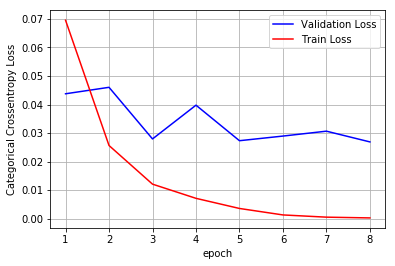

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 2 (with dropout), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(Dropout(0.50))
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu',padding='same'))
model.add(Dropout(0.50))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       32896    

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 1395s 23ms/step - loss: 0.3289 - acc: 0.8980 - val_loss: 0.0680 - val_acc: 0.9807
Epoch 2/8
60000/60000 [==============================] - 1399s 23ms/step - loss: 0.1074 - acc: 0.9677 - val_loss: 0.0539 - val_acc: 0.9840
Epoch 3/8
60000/60000 [==============================] - 1404s 23ms/step - loss: 0.0821 - acc: 0.9763 - val_loss: 0.0436 - val_acc: 0.9875
Epoch 4/8
60000/60000 [==============================] - 1405s 23ms/step - loss: 0.0698 - acc: 0.9797 - val_loss: 0.0384 - val_acc: 0.9868
Epoch 5/8
60000/60000 [==============================] - 1401s 23ms/step - loss: 0.0603 - acc: 0.9826 - val_loss: 0.0337 - val_acc: 0.9887
Epoch 6/8
60000/60000 [==============================] - 1412s 24ms/step - loss: 0.0564 - acc: 0.9838 - val_loss: 0.0281 - val_acc: 0.9897
Epoch 7/8
60000/60000 [==============================] - 1406s 23ms/step - loss: 0.0538 - acc: 0.9848 - val_loss: 0.

Test loss: 0.035588841447234155
Test accuracy: 0.988


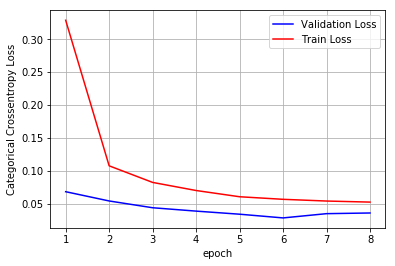

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

### Model 3 (with batch normal), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 1731s 29ms/step - loss: 0.2925 - acc: 0.9064 - val_loss: 0.1820 - val_acc: 0.9485
Epoch 2/8
60000/60000 [==============================] - 1683s 28ms/step - loss: 0.0546 - acc: 0.9836 - val_loss: 0.1304 - val_acc: 0.9665
Epoch 3/8
60000/60000 [==============================] - 1660s 28ms/step - loss: 0.0351 - acc: 0.9893 - val_loss: 0.0901 - val_acc: 0.9730
Epoch 4/8
60000/60000 [==============================] - 1634s 27ms/step - loss: 0.0235 - acc: 0.9931 - val_loss: 0.1512 - val_acc: 0.9484
Epoch 5/8
60000/60000 [==============================] - 1691s 28ms/step - loss: 0.0166 - acc: 0.9952 - val_loss: 0.0337 - val_acc: 0.9905
Epoch 6/8
60000/60000 [==============================] - 1677s 28ms/step - loss: 0.0119 - acc: 0.9967 - val_loss: 0.0287 - val_acc: 0.9932
Epoch 7/8
60000/60000

Test loss: 0.0645820923813153
Test accuracy: 0.9797


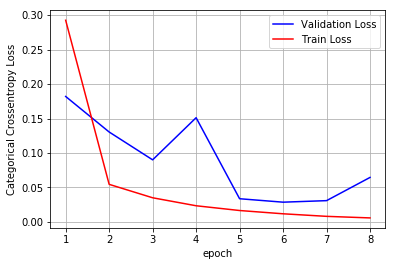

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 3 (normal), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(8, kernel_size=(1, 1),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu',))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         16        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        528       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       32896     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       131328    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 512)   

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 3244s 54ms/step - loss: 0.2812 - acc: 0.9138 - val_loss: 0.0669 - val_acc: 0.9799
Epoch 2/8
60000/60000 [==============================] - 3227s 54ms/step - loss: 0.0528 - acc: 0.9841 - val_loss: 0.0486 - val_acc: 0.9850
Epoch 3/8
60000/60000 [==============================] - 3049s 51ms/step - loss: 0.0305 - acc: 0.9909 - val_loss: 0.0458 - val_acc: 0.9866
Epoch 4/8
60000/60000 [==============================] - 2979s 50ms/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0542 - val_acc: 0.9869
Epoch 5/8
60000/60000 [==============================] - 2985s 50ms/step - loss: 0.0111 - acc: 0.9971 - val_loss: 0.0540 - val_acc: 0.9875
Epoch 6/8
60000/60000 [==============================] - 2985s 50ms/step - loss: 0.0084 - acc: 0.9977 - val_loss: 0.1180 - val_acc: 0.9807
Epoch 7/8
60000/600

Test loss: 0.07901631979934313
Test accuracy: 0.9881


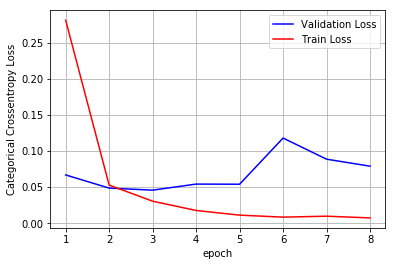

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

### Model 3 (with padding), kernel_size=(2, 2) 

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(8, kernel_size=(1, 1),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu',padding='same'))
model.add(Conv2D(512, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         16        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 4426s 74ms/step - loss: 0.2214 - acc: 0.9464 - val_loss: 0.0492 - val_acc: 0.9837
Epoch 2/8
60000/60000 [==============================] - 4327s 72ms/step - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0358 - val_acc: 0.9891
Epoch 3/8
60000/60000 [==============================] - 4309s 72ms/step - loss: 0.0210 - acc: 0.9940 - val_loss: 0.0280 - val_acc: 0.9915
Epoch 4/8
60000/60000 [==============================] - 4401s 73ms/step - loss: 0.0115 - acc: 0.9967 - val_loss: 0.0311 - val_acc: 0.9916
Epoch 5/8
60000/60000 [==============================] - 4364s 73ms/step - loss: 0.0081 - acc: 0.9975 - val_loss: 0.0556 - val_acc: 0.9883
Epoch 6/8
60000/60000 [==============================] - 4355s 73ms/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0633 - val_acc: 0.9888
Epoch 7/8
60000/60000

Test loss: 0.06536498322770831
Test accuracy: 0.9899


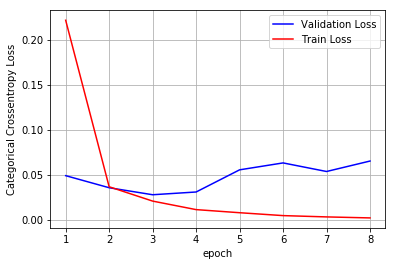

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting diverged.

###  Model 3 (with batch normal), kernel_size=(2, 2)

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
#model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.15))
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
#model.add(Dropout(0.005))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.0005))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 346s 6ms/step - loss: 0.1501 - acc: 0.9601 - val_loss: 0.2560 - val_acc: 0.9178
Epoch 2/8
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0802 - acc: 0.9824 - val_loss: 0.3714 - val_acc: 0.8877
Epoch 3/8
60000/60000 [==============================] - 336s 6ms/step - loss: 0.0630 - acc: 0.9871 - val_loss: 0.0984 - val_acc: 0.9729
Epoch 4/8
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0373 - acc: 0.9917 - val_loss: 0.0579 - val_acc: 0.9878
Epoch 5/8
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0284 - acc: 0.9931 - val_loss: 0.0338 - val_acc: 0.9907
Epoch 6/8
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0232 - acc: 0.9946 - val_loss: 0.0562 - val_acc: 0.9894
Epoch 7/8
60000/60000 [==========

Test loss: 0.038901877784033194
Test accuracy: 0.9915


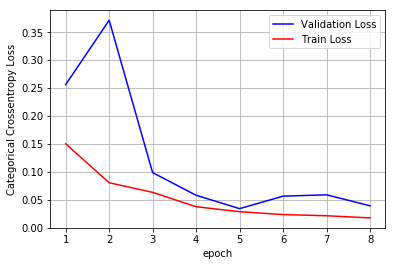

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

### Model 3 (with dropout), kernel_size=(2, 2)  

In [ ]:
import warnings

model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.005))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.0005))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
____

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
warnings.filterwarnings("ignore")
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 390s 7ms/step - loss: 0.1523 - acc: 0.9528 - val_loss: 0.0531 - val_acc: 0.9838
Epoch 2/8
60000/60000 [==============================] - 393s 7ms/step - loss: 0.0976 - acc: 0.9766 - val_loss: 0.0511 - val_acc: 0.9843
Epoch 3/8
60000/60000 [==============================] - 394s 7ms/step - loss: 0.0578 - acc: 0.9848 - val_loss: 0.0417 - val_acc: 0.9886
Epoch 4/8
60000/60000 [==============================] - 390s 6ms/step - loss: 0.0413 - acc: 0.9880 - val_loss: 0.1936 - val_acc: 0.9418
Epoch 5/8
60000/60000 [==============================] - 390s 6ms/step - loss: 0.0310 - acc: 0.9910 - val_loss: 0.1171 - val_acc: 0.9797
Epoch 6/8
60000/60000 [==============================] - 394s 7ms/step - loss: 0.0315 - acc: 0.9918 - val_loss: 0.0371 - val_acc: 0.9889
Epoch 7/8
60000/60000 [==============================] - 380s 6ms/step - loss: 0.0244 - acc: 0.9931 - val_loss: 0.1036 - val_acc

Test loss: 0.03260225059746035
Test accuracy: 0.9919


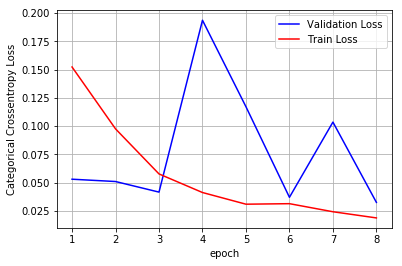

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Observation:
    From above plot we can see that train and test data loss are getting converged.

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model","kernel_size","method", "Total Params ", "Test Accuracy","Epoch vs loss graph"]

x.add_row(["Model1(conv = 3)","3X3",'Normal','1,015,946',0.9881,'Diverge'])
x.add_row(["Model1(conv = 3)","3X3",'Padding','1,630,346',0.9889,'Diverge'])
x.add_row(["Model1(conv = 3)","3X3",'Batch Normal', '1,630,730',0.9922,'Diverge'])
x.add_row(["Model1(conv = 3)","3X3",'Dropout', '1,630,730',0.9881,'Converge'])
x.add_row(["------------------------------------",'-------','-------', '-------', '---','--------'])
x.add_row(["Model2(conv = 5)","2X2",'Normal','6,598,586', 0.9793,'Diverge'])
x.add_row(["Model2(conv = 5)","2X2",'Padding','6,598,586', 0.9793,'Converge'])
x.add_row(["Model2(conv = 5)","2X2",'Batch Normal','6,601,402', 0.992,'Diverge'])
x.add_row(["Model2(conv = 5)","2X2",'Dropout','6,598,586',0.988,'Converge'])  
x.add_row(["------------------------------------",'-------', '-------', '--------','---','---------'])
x.add_row(["Model3(conv = 7)","2X2",'Normal','32,420,746', 0.9881,'Diverge'])
x.add_row(["Model3(conv = 7)","2X2",'Padding','52,086,090', 0.9782,'Diverge'])
x.add_row(["Model3(conv = 7)","2X2",'Batch Normal','770,914', 0.9915,'Converge'])
x.add_row(["Model3(conv = 7)","2X2",'Dropout','770,914', 0.99,'Converge'])
print(x)

+--------------------------------------+-------------+--------------+---------------+---------------+---------------------+
|                Model                 | kernel_size |    method    | Total Params  | Test Accuracy | Epoch vs loss graph |
+--------------------------------------+-------------+--------------+---------------+---------------+---------------------+
|           Model1(conv = 3)           |     3X3     |    Normal    |   1,015,946   |     0.9881    |       Diverge       |
|           Model1(conv = 3)           |     3X3     |   Padding    |   1,630,346   |     0.9889    |       Diverge       |
|           Model1(conv = 3)           |     3X3     | Batch Normal |   1,630,730   |     0.9922    |       Diverge       |
|           Model1(conv = 3)           |     3X3     |   Dropout    |   1,630,730   |     0.9881    |       Converge      |
| ------------------------------------ |   -------   |   -------    |    -------    |      ---      |       --------      |
|       